In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("C:/Users/ssair/datasets/delivery_time.csv")


In [3]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA  

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data2 = data.rename({'Delivery Time': 'Delivery_Time','Sorting Time':'Sorting_Time'}, axis=1)

In [6]:
data2

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation Analysis

In [7]:
data2.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


Text(0, 0.5, 'Delivery time')

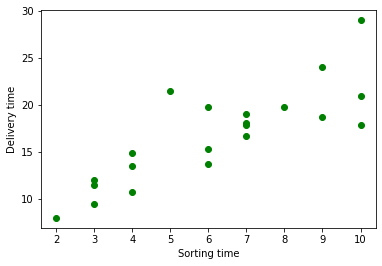

In [8]:
plt.scatter(x=data2.Sorting_Time, y=data2.Delivery_Time, color='green')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

C:\Users\ssair\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

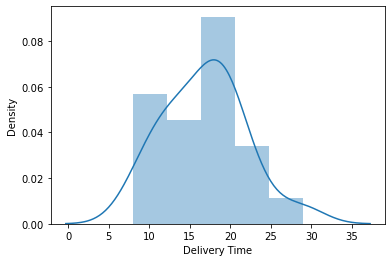

In [9]:
import seaborn as sns
sns.distplot(data['Delivery Time'])

C:\Users\ssair\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

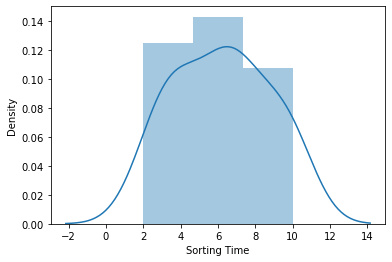

In [10]:
import seaborn as sns
sns.distplot(data['Sorting Time'])

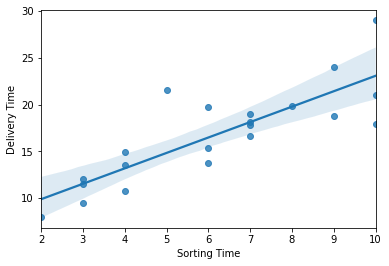

In [24]:
sns.regplot(x="Sorting Time", y="Delivery Time", data=data);

# Model Building

In [11]:
model1=smf.ols("Delivery_Time~Sorting_Time",data=data2).fit()

# Testing

In [12]:
model1.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [13]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           3.98e-06
Time:                        17:38:40   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model1.conf_int(0.05)

,0,1
Intercept,2.979134,10.186334
Sorting_Time,1.108673,2.189367


In [15]:
pred = model1.predict(data2) 

In [17]:
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues)  

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [18]:
(model1.rsquared,model1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Prediction for new point

In [19]:
new_data=pd.Series([10,4,6])
new_data

0    10
1     4
2     6
dtype: int64

In [20]:
data_pred=pd.DataFrame(new_data,columns=['Sorting_Time'])
data_pred

,Sorting_Time
0,10
1,4
2,6


In [21]:
model1.predict(data_pred)

0    23.072933
1    13.178814
2    16.476853
dtype: float64